# Machine Learning Assignment
### Aditya Gavankar (J072)

## Exp 3 :- Linear Regression / Gradient Descent

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Univariate Linear Regression

In [2]:
data=pd.read_csv("ex1data1.txt", header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
data.columns = ['Population', 'Profit']
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Profit vs Population')

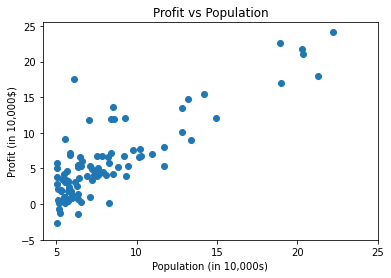

In [5]:
plt.scatter(data['Population'], data['Profit'])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

## Cost function J(θ)

In [6]:
def computeCost(X,y,theta):
    """
    Take in a numpy arary X,y,theta and get cost function using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    
    return 1/(m)*np.sum(square_err)

In [7]:
data['x0'] = 1

In [8]:
data_val = data.values
m =  len(data_val[:-1])
X = data[['x0','Population']].iloc[:-1].values
y = data['Profit'][:-1].values.reshape(m,1)
theta = np.zeros((2,1))

m, X.shape, y.shape, theta.shape

(96, (96, 2), (96, 1), (2, 1))

## h(θ) = x0*θ0 +x1*θ1 +.... (x0 = 1)

In [9]:
computeCost(X,y,theta)

64.80968355754062

In [10]:
data.tail()

,Population,Profit,x0
92,5.8707,7.20290,1
93,5.3054,1.98690,1
94,8.2934,0.14454,1
95,13.3940,9.05510,1
96,5.4369,0.61705,1


## Gradient Descent

In [11]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take numpy array for X,y,theta and update theta for every iteration of gradient steps
    
    return theta and the list of cost of theta during each iteration
    """
    
    m = len(y)
    J_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions-y))
        descent = alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
        
    return theta, J_history

In [12]:
theta, J_history = gradientDescent(X,y,theta,0.001, 2000)

In [13]:
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))}x1")

h(x) = -1.11 + 0.92x1


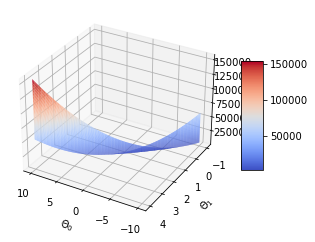

In [14]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

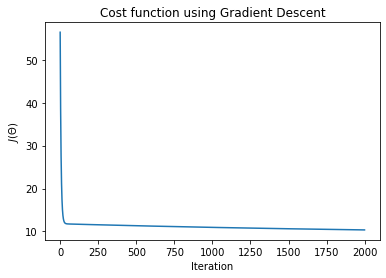

In [15]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

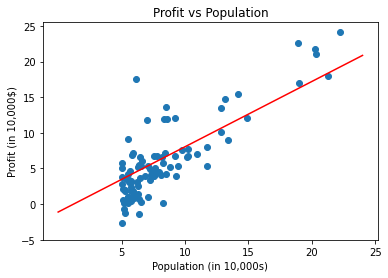

In [16]:
plt.scatter(data['Population'], data['Profit'])
x_value = [x for x in range(25)]
y_value = [x*theta[1] + theta[0] for x in x_value]
plt.plot(x_value, y_value, color = 'r')
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')
plt.title('Profit vs Population')

In [17]:
def predict(x,theta):
    """
    takes in numpy array x and theta and returns predicted value of y
    """
    predictions = np.dot(theta.transpose(),x)
    return predictions[0]
    

In [18]:
data.tail(1)

,Population,Profit,x0
96,5.4369,0.61705,1


In [19]:
predict1 = predict(data[['x0','Population']].iloc[-1].values, theta)*10000
print(f'For a population of 6170 the predicted profit is ${predict1}')

For a population of 6170 the predicted profit is $38686.246103378166


# Multivariate Linear Regression

In [20]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
np.random.seed(123)

In [21]:
df=pd.read_csv("ex1data2.txt", header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
df.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [23]:
df.columns = ['Size of House(in sq.ft)', 'No. of BHK','Price']
df.head()

,Size of House(in sq.ft),No. of BHK,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
df.isnull().sum()

Size of House(in sq.ft)    0
No. of BHK                 0
Price                      0
dtype: int64

## Cost Function J(θ)

In [25]:
def normalize(dataframe):
    dft = dataframe.copy()
    for col in dft.columns:
        dft[col] = (dft[col] - dft[col].mean()) / dft[col].std()
    return dft

In [26]:
normalized_df = normalize(df)
normalized_df.head()

,Size of House(in sq.ft),No. of BHK,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [27]:
X = normalized_df.iloc[:,:-1].values
y = normalized_df.iloc[:,-1].values

m = y.size
n = df.shape[1]

In [28]:
y.shape

(47,)

In [29]:
y = y.reshape(m,1)
y.shape

(47, 1)

In [30]:
ones = np.ones((m,1))
X1 = np.concatenate((ones,X),axis=1)
X1[:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

## Gradient Descent

In [31]:
alpha = 0.01
theta = np.random.rand(n,1)
epoch = 10000

In [32]:
def GD(X1,y,theta,epoch,alpha,decimals=5):
    past_cost = []
    past_theta = [theta]
    m = y.size
    n = X1.shape[1]
    for i in range(epoch):
        h_theta = np.dot(X1,theta)
        error = h_theta - y
        cost = np.dot(error.T,error)/(2*m)
        past_cost.append(cost[0][0])
        diff=np.dot(X1.T,error)/m
        theta=theta-(alpha*diff)
        past_theta.append(theta)
        if np.equal(np.round(past_theta[i],decimals=decimals),np.round(past_theta[i+1],decimals=decimals)).sum() == n:
            break
    return past_cost, past_theta, i+1

In [33]:
pastCost, pastTheta, stop_epoch = GD(X1=X1, y=y, theta=theta, epoch=epoch, alpha=alpha)
print(f'Our model performed {stop_epoch} epochs out of {epoch} epochs before converging')

Our model performed 1320 epochs out of 10000 epochs before converging


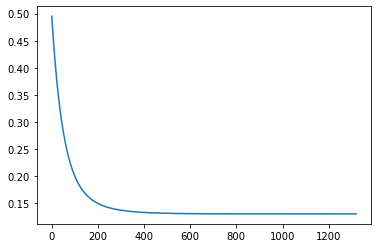

In [34]:
plt.plot(pastCost)

In [35]:
new_theta = np.array(pastTheta[-1]).reshape(n,)
print(new_theta)

[ 1.20603184e-06  8.83291779e-01 -5.17046112e-02]


In [36]:
print(f'Parameters from StatsModels == {sm.OLS(y,X1).fit().params}')
print(f'Parameters from SciKitLearn == {LinearRegression().fit(X1,y).coef_}')

Parameters from StatsModels == [-9.71445147e-17  8.84765988e-01 -5.31788197e-02]
Parameters from SciKitLearn == [[ 0.          0.88476599 -0.05317882]]
